**Задача 1**

Напишите функцию, которая по заданному p и вектору **х** вычисляет норму этого вектора $$ {\|x\|}_p = (\sum_{i=1}^n |x_i|^n)^{1/n}$$
Вторая функция, которая вычисляет подчинённую этой норме метричную норму данной матрицы, а также число обусловленности.

In [ ]:
import numpy as np
from scipy.optimize import minimize
from numpy import linalg as LA

x0 = np.array([-1, 2, 3])
A = np.array([[-1, 2, 3],
            [4, 0, 4],
            [1, 2, 3]])

def vec(p, x):
    return (np.sum(np.abs(x[:])**p))**(1/p) 

def mat(A, p):
    def f(x):
        return -vec(p,A@x)/vec(p, x)   
    res = minimize(f, x0, method='Nelder-Mead', tol=1e-6)   
    return -f(res.x)

print(LA.norm(A, ord = 2))
mat(A, 2)

6.830661262137769


6.830661262137771

**Задача 2**

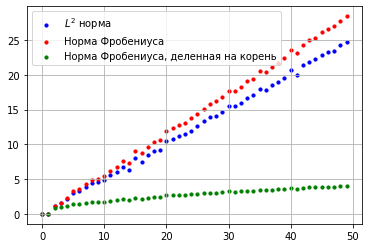

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA

B = np.array([[-1, -1, -1],
             [-1, -1, 0]])

def frobenius(a):
    u, s, vh = np.linalg.svd(a, full_matrices=False)
    return np.sqrt(np.sum((s[:])**2))

def norm(a):
    u, s, vh = np.linalg.svd(a, full_matrices=False)
    return np.max(s)

max = 50
n = range(max)
mean = np.zeros(max)
f = np.empty([1, max])
f1 = np.empty([1, max])
f2 = np.empty([1, max])

for i in range(2, max, 1):
    a = np.random.random(size=(i, i))
    f[0, i] = norm(a)
    f1[0, i] = frobenius(a)
    f2[0, i] = frobenius(a)/np.sqrt(i)
    mean[i] = norm(a)/frobenius(a)

    
plt.grid(True)    
plt.scatter(n, f, c = 'b', s= 10, label= "$L^2$ норма")
plt.scatter(n, f1, c = 'r', s= 10, label= "Норма Фробениуса")
plt.scatter(n, f2, c = 'g', s= 10, label= "Норма Фробениуса, деленная на корень")
plt.legend()
plt.show()

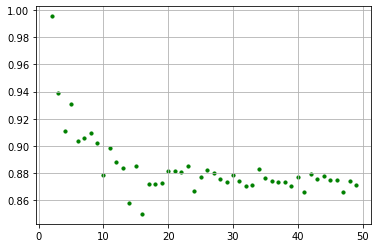

In [ ]:
np.mean(mean[2:max:1])
plt.grid(True)
plt.scatter(n[2:max:1], mean[2:max:1], marker = "o", c = 'g', s= 10)
plt.show()

**Задача 3**

In [ ]:
import numpy as np

A = np.array([[2, 1], [-1, 2]])

def norm(A):
    L = np.linalg.cholesky(A)
    z = np.random.randn(L.shape[1]).reshape(-1, 1)
    m = np.random.randint(0, high=10, size=L.shape[1]).reshape(-1, 1)
    return m + L@z

X = norm(A)
print(X)

[[6.62372208]
 [3.56479382]]


**Задача 4**

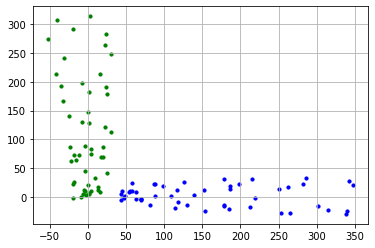

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import procrustes

noise = 10*np.random.randn(51, 2)
X1 = np.empty([51, 2])
for i in range(-25, 26, 1):
    X1[i + 25, 0] = i
    X1[i + 25, 1] = 0.5*X1[i + 25, 0]**2
S = np.array([[0, -1],[1, 0]])
X2 = X1.copy()

mu = np.array([50, 0]) # сдвиг
for t in range(X1.shape[0]):
    X2[t, :] = mu + X1[t, :]@S 
X1 = X1 + noise
X2 = X2 + noise #шум
plt.grid(True)
plt.scatter(X1[:,0], X1[:,1], marker = "o", c = 'g', s = 10)
plt.scatter(X2[:,0], X2[:,1], marker = "o", c = 'b', s = 10)
plt.show()

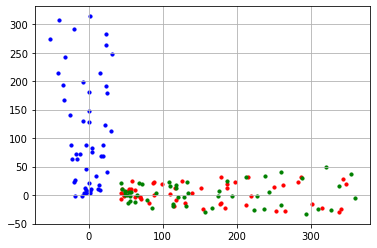

In [ ]:
def procrust(X1, X2):
    x1 = np.mean(X1, axis=0).reshape(-1, 1)
    x2 = np.mean(X2, axis=0).reshape(-1, 1)
    e = np.ones(X1.shape[0]).reshape(-1, 1)
    A1 = X1 - e @ x1.T
    A2 = X2 - e @ x2.T
    B = A1.T @ A2
    u, d, v = np.linalg.svd(B, full_matrices = False, compute_uv = True)
    r = u @ v.T
    mu = x2 - r.T @ x1
    return (X1@r + e @ mu.T)

P = procrust(X1, X2)

plt.grid(True)
plt.scatter(X1[:,0], X1[:,1], c = 'b', s = 10)
plt.scatter(X2[:,0], X2[:,1], c = 'r', s = 10)
plt.scatter(P[:,0], P[:,1], c = 'g', s = 10)
plt.show()

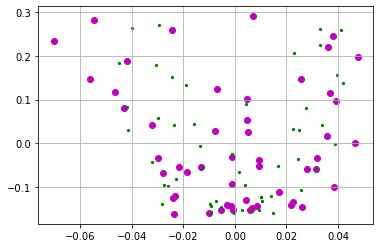

In [ ]:
mtx1, mtx2, disparity = procrustes(X1, X2)

plt.grid(True)
plt.scatter(mtx1[:,0], mtx1[:,1], c = 'm')
plt.scatter(mtx2[:,0], mtx2[:,1], c = 'g', s= 5)
plt.show()